In [30]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

import sys
import os

import warnings
warnings.filterwarnings('ignore')


#Función para sacar outliers
#(se puede cambiar eso de s-s.mean <= etc, esa es una forma posible de detectar outliers)

def mascara_outliers(s, mult):
    return abs(s - s.mean()) <= mult*s.std()

def sacar_outliers(datos,tag,mult):
    mascara = mascara_outliers(datos[tag], mult)
    return datos[mascara]


#Función para delimitar ejes:
#(dice dominio, pero se puede usar para imagen también... ya se que esta medio cabeza, pero anda bien)

def mascara_dominio_abajo(s,x0):
    return x0 <= s
def mascara_dominio_arriba(s,x1):
    return s <= x1

def achicar_dominio(datos,tag,x0,x1):
    mascara = mascara_dominio_abajo(datos[tag],x0)
    datos = datos[mascara]
    mascara = mascara_dominio_arriba(datos[tag],x1)
    return datos[mascara]


#Función para crear una columna con cada año
#(es imrpotante haber cargado el csv con el arguemtno parse_dates=[tag])
def crear_col_anos(datos,tag):
    return datos[tag].apply (lambda x : x.year if x.month <= 12 else x.year + 1)


#Graficadores

def graficador(data, tagX, tagY, title, labelX, labelY, interp, col):
    ax = sns.tsplot(data=data[tagY], time=data[tagX], interpolate=interp, color=col)
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)

def graficadorSimple(xs,ys,title,labelX,labelY,interp,col):
    ax = sns.tsplot(data=ys, time=xs, interpolate=interp, color=col)
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
def barras(xs,ys,title, labelX, labelY):
    sns.barplot(x=xs, y=ys)
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)

def mostrar():
    plt.show()
    plt.close()


#Auxiliares

def descripcion(datos):
    print(datos.describe())

def ver_filas(datos, fil):
    print(datos.head(fil))

[[25, 23, 37, 15], [21, 26, 29, 24], [25, 19, 32, 24], [28, 28, 19, 25], [19, 29, 32, 20]]


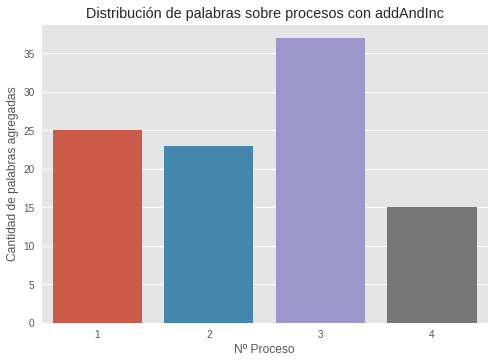

In [77]:
################################
# Levanto los datos, y los veo #
################################

df_distr = []
df_distr.append(pd.read_csv('./distr/1.csv'))
df_distr.append(pd.read_csv('./distr/2.csv'))
df_distr.append(pd.read_csv('./distr/3.csv'))
df_distr.append(pd.read_csv('./distr/4.csv'))
df_distr.append(pd.read_csv('./distr/5.csv'))



procesos = []
for i in range(0,5):
    aux = []
    for i in range(0,4):
        aux.append(0)
    procesos.append(aux)


for i in range(0,5):
    for j in range(0,100):
        procesos[i][df_distr[i]['rank'][j]-1] = procesos[i][df_distr[i]['rank'][j]-1] + 1
print(procesos)
numeros = [1,2,3,4]

barras(numeros, procesos[0], 'Distribución de palabras sobre procesos con addAndInc', 'Nº Proceso', 'Cantidad de palabras agregadas')
mostrar()


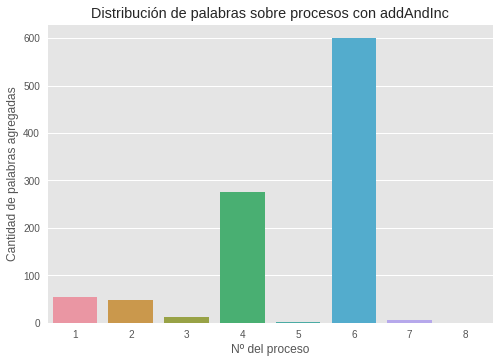

In [85]:
df_distr1000 = pd.read_csv('./distr/1000.csv')

mil = []
for i in range(0,8):
    mil.append(0)

numeros8 = [1,2,3,4,5,6,7,8]
for j in range(0,1000):
    indice = df_distr1000['rank'][j]-1
    #mil[df_distr1000['rank'][j]-1] = mil[df_distr['rank'][j]-1] + 1
    mil[int(indice)] = mil[int(indice)] + 1
barras(numeros8, mil, 'Distribución de palabras sobre procesos con addAndInc', 'Nº del proceso', 'Cantidad de palabras agregadas')
mostrar()

In [40]:
df_actual = pd.read_csv('./var/2/rc1.csv')
ver_filas(df_actual,10)

    tiempo  rank     max
0  2.95078     1  2.1094
1  0.78079     1  0.0000
2  1.10792     1  0.0000
3  1.42362     1  0.0000
4  1.72989     1  0.0000
5  2.21759     1  0.0000
6  1.72829     1  0.0000
7  2.50047     1  0.0000
8  1.38541     1  0.0000
9  1.91774     1  0.0000


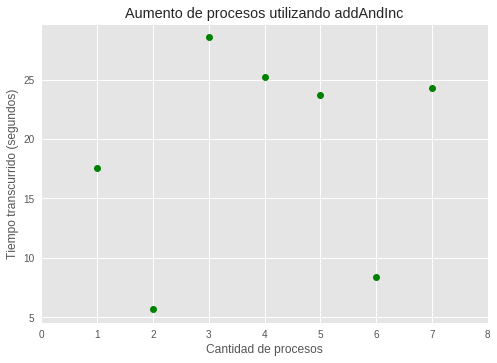

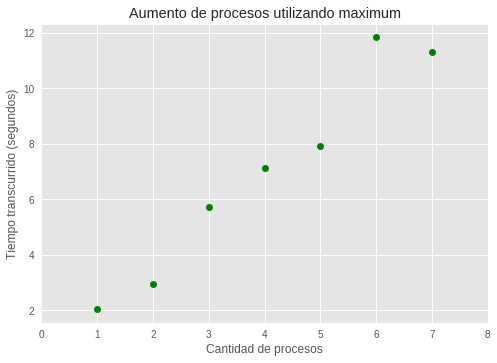

In [99]:
df_exp1 = []
df_exp1_nombres = []
for filename in sorted(os.listdir('./var')):
    df_exp1_nombres.append(filename)
    primero = True
    for file_exp in sorted(os.listdir('./var/'+str(filename))):
        df_actual = pd.read_csv('./var/'+str(filename)+'/'+str(file_exp))
        if(primero):
            df_exp1.append(df_actual)
            primero = False
        else:
            df_exp1[-1]['max'] = df_exp1[-1]['max'] + df_actual['max']
            df_exp1[-1]['tiempo'] = df_exp1[-1]['tiempo'] + df_actual['tiempo']

for i in range(0,len(df_exp1)):
    df_exp1[i]['tiempo'] = df_exp1[i]['tiempo'] / 5
    df_exp1[i]['max'][0] = df_exp1[i]['max'][0] / 5

addAndInc = []
maximum = []
for i in range(0,7):
    count = 0
    for j in range(0,100):
        count = count + df_exp1[i]['tiempo'][j]
    count = count/100
    addAndInc.append(count)
    maximum.append(df_exp1[i]['max'][0])

numeros7 = [1,2,3,4,5,6,7]

graficadorSimple(numeros7,addAndInc,'Aumento de procesos utilizando addAndInc','Cantidad de procesos','Tiempo transcurrido (segundos)',False,'g')
mostrar()

graficadorSimple(numeros7,maximum,'Aumento de procesos utilizando maximum','Cantidad de procesos','Tiempo transcurrido (segundos)',False,'g')
mostrar()